In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('vgsales.csv')

In [ ]:
df.describe()

In [8]:
cols = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

In [9]:
df_zscore = pd.DataFrame()
for col in cols:
    df_zscore[col] = (df[col] - df[col].mean())/df[col].std(ddof=0)

In [10]:
print(df_zscore)

        NA_Sales   EU_Sales   JP_Sales  Other_Sales  Global_Sales
0      50.480508  57.136930  11.938058    44.606085     52.864025
1      35.284437   6.794188  21.767296     3.828224     25.532503
2      19.084273  25.197785  12.002724    17.297115     22.690025
3      18.961823  21.497277  10.353740    15.441165     20.876498
4      13.476053  17.302048  32.792857     5.047848     19.828254
...          ...        ...        ...          ...           ...
16593  -0.311841  -0.290207  -0.251492    -0.254864     -0.339194
16594  -0.311841  -0.290207  -0.251492    -0.254864     -0.339194
16595  -0.324086  -0.290207  -0.251492    -0.254864     -0.339194
16596  -0.324086  -0.270418  -0.251492    -0.254864     -0.339194
16597  -0.311841  -0.290207  -0.251492    -0.254864     -0.339194

[16598 rows x 5 columns]


<Axes: >

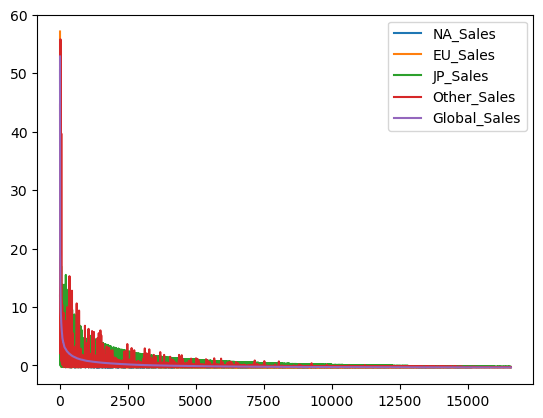

In [11]:
df_zscore.plot()

In [12]:
df_dscale = pd.DataFrame()
for col in cols:
    p = df[col].max()
    q = len(str(abs(int(p))))
    df_dscale[col] = df[col]/10**q

In [13]:
print(df_dscale)

       NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
0        0.4149    0.2902    0.0377       0.0846        0.8274
1        0.2908    0.0358    0.0681       0.0077        0.4024
2        0.1585    0.1288    0.0379       0.0331        0.3582
3        0.1575    0.1101    0.0328       0.0296        0.3300
4        0.1127    0.0889    0.1022       0.0100        0.3137
...         ...       ...       ...          ...           ...
16593    0.0001    0.0000    0.0000       0.0000        0.0001
16594    0.0001    0.0000    0.0000       0.0000        0.0001
16595    0.0000    0.0000    0.0000       0.0000        0.0001
16596    0.0000    0.0001    0.0000       0.0000        0.0001
16597    0.0001    0.0000    0.0000       0.0000        0.0001

[16598 rows x 5 columns]


<Axes: >

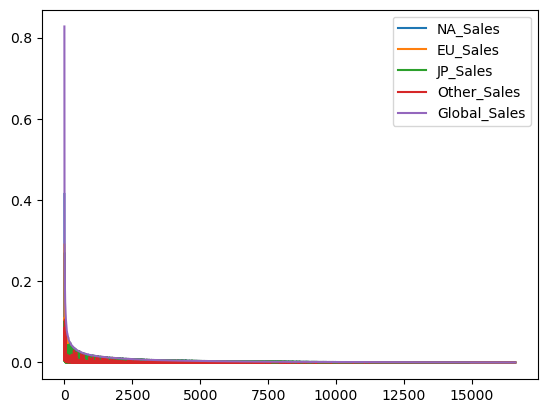

In [14]:
df_dscale.plot()

In [17]:
dups_platform = df.pivot_table(index=['Platform'], aggfunc='size')
print (dups_platform)
type(dups_platform)

Platform
2600     133
3DO        3
3DS      509
DC        52
DS      2163
GB        98
GBA      822
GC       556
GEN       27
GG         1
N64      319
NES       98
NG        12
PC       960
PCFX       1
PS      1196
PS2     2161
PS3     1329
PS4      336
PSP     1213
PSV      413
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1325
WiiU     143
X360    1265
XB       824
XOne     213
dtype: int64


pandas.core.series.Series

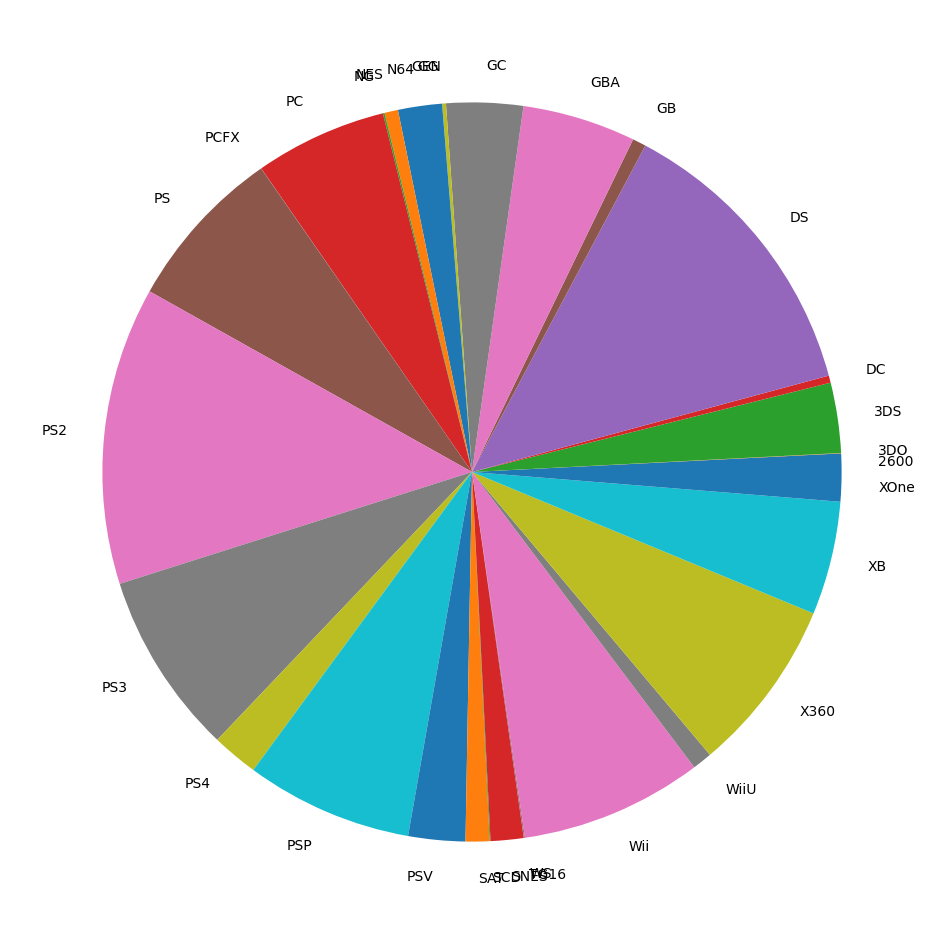

In [18]:
plot = dups_platform.plot.pie(y='Platform', figsize=(12, 12))

In [19]:
dups_platform_genre = df.pivot_table(index=['Platform','Genre'], aggfunc='size')
print(dups_platform_genre)

Platform  Genre       
2600      Action          61
          Adventure        2
          Fighting         2
          Misc             5
          Platform         9
                          ..
XOne      Role-Playing    13
          Shooter         33
          Simulation       3
          Sports          36
          Strategy         3
Length: 293, dtype: int64


In [20]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(dups_platform_genre)

Platform  Genre       
2600      Action           61
          Adventure         2
          Fighting          2
          Misc              5
          Platform          9
          Puzzle           11
          Racing            6
          Shooter          24
          Simulation        1
          Sports           12
3DO       Adventure         1
          Puzzle            1
          Simulation        1
3DS       Action          182
          Adventure        37
          Fighting         14
          Misc             53
          Platform         28
          Puzzle           20
          Racing           11
          Role-Playing     86
          Shooter           7
          Simulation       30
          Sports           26
          Strategy         15
DC        Action            3
          Adventure        11
          Fighting         12
          Platform          2
          Racing            6
          Role-Playing      4
          Shooter           3
          Simulat

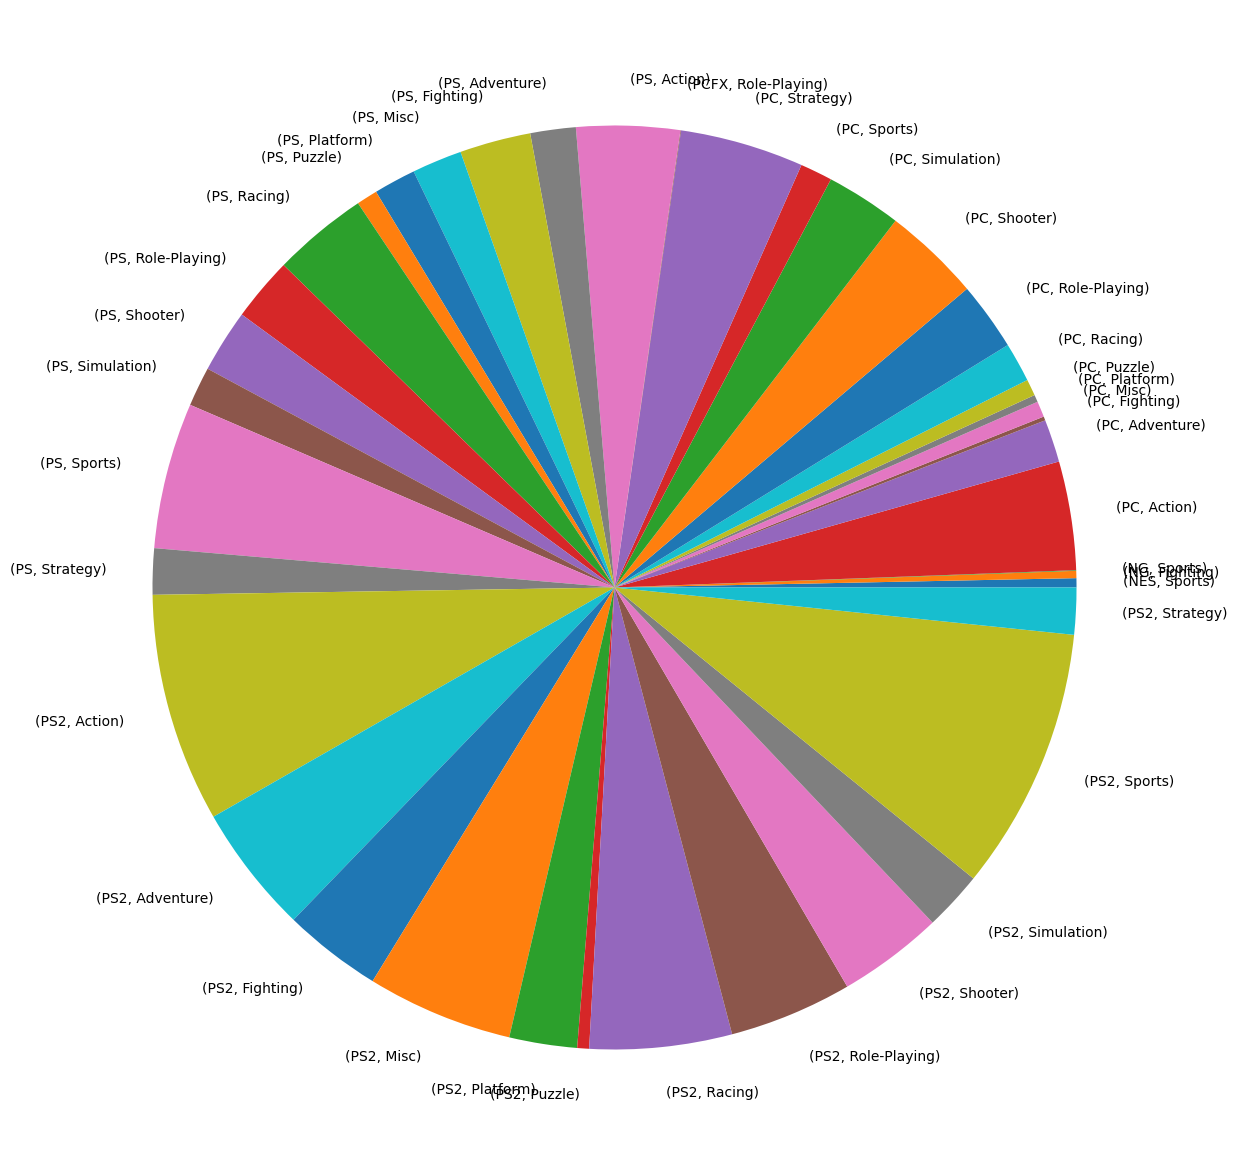

In [28]:
plot = dups_platform_genre[113:153].plot.pie(subplots=True, figsize=(15,15))

C:\Users\wirar\AppData\Local\Temp\ipykernel_13468\1091925709.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr())


                  Rank      Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Rank          1.000000  0.178814 -0.401362 -0.379123 -0.267785    -0.332986   
Year          0.178814  1.000000 -0.091402  0.006014 -0.169316     0.041058   
NA_Sales     -0.401362 -0.091402  1.000000  0.767727  0.449787     0.634737   
EU_Sales     -0.379123  0.006014  0.767727  1.000000  0.435584     0.726385   
JP_Sales     -0.267785 -0.169316  0.449787  0.435584  1.000000     0.290186   
Other_Sales  -0.332986  0.041058  0.634737  0.726385  0.290186     1.000000   
Global_Sales -0.427407 -0.074735  0.941047  0.902836  0.611816     0.748331   

              Global_Sales  
Rank             -0.427407  
Year             -0.074735  
NA_Sales          0.941047  
EU_Sales          0.902836  
JP_Sales          0.611816  
Other_Sales       0.748331  
Global_Sales      1.000000  


C:\Users\wirar\AppData\Local\Temp\ipykernel_13468\1091925709.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


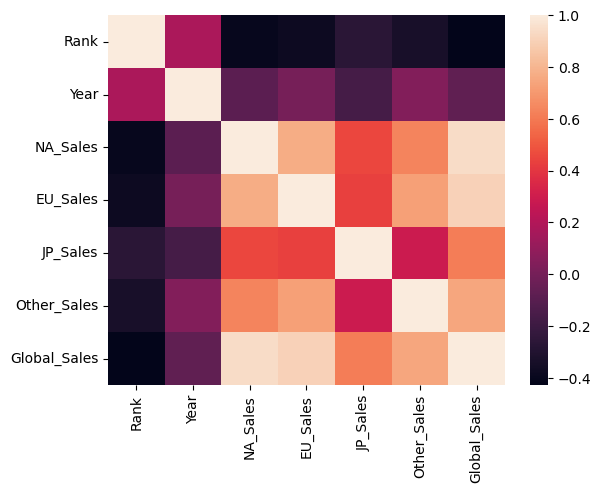

In [29]:
ax = sns.heatmap(df.corr())
print(df.corr())

In [48]:
import numpy as np
import random as rd
N = 500
x = []
y = []
for i in range (1,N):
    x.append(i+rd.randint(1,10))
    y.append(i)
x = np.array(x)
y = np.array(y)

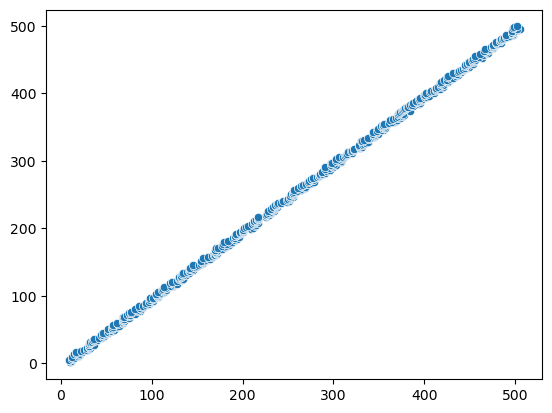

In [49]:
ax = sns.scatterplot(x=x, y=y)

In [ ]:
ax = sns.scatterplot(data=df,x="Global_Sales", y="JP_Sales")

In [ ]:
ax = sns.relplot(data=df,x='Year', y='NA_Sales',hue='Platform',kind="line")

In [ ]:
ax = sns.relplot(data=df,x='JP_Sales', y='Global_Sales',hue='Platform',kind="line")